一、观察数据

通过查看数据我们发现给出的数据一共有12个属性
PassengerId:乘客的Id
Survived:乘客生还与否
Pclass:乘客乘坐的等级(也可以认为是乘客的等级)
Name:乘客的姓名
Sex:乘客的性别
Age:乘客的年龄
SibSp:乘客的堂兄弟/妹个数
Parch:乘客的父母/小孩的个数
Ticket:船票号
Fare:乘客船票的费用
Cabin:客舱的名称
Embarked:从哪个港口登陆的

In [1]:
#先加载训练集的数据
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

data_train = pd.read_csv("/Users/bindo/Desktop/Titanic/train.csv")
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [2]:
# 大致看一下基本信息
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


这里发现 Age 和Cabin有缺失

In [3]:
#看一下数据
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1.训练集data_train中Survived的mean=0.383838,说明整个训练集890的乘客中,大概有0.383838的人获救了.
2.再看Pclass(乘客等级(1/2/3等舱位)):25%分位数是2,50%和75%分位数都是3,说明占据大多数的是2等级和3等级的乘客,1等级的少
3.乘客的平均年龄Age的mean=29.7岁左右
到这里是对数据的大致了解.


二、分析数据

In [4]:
#下面通过可视化对数据进一步分析
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10),facecolor='white') #an empty figure with no axes
fig.set(alpha = 0.2) #alpha : 透明度，值在0到1之间，0为完全透明，1为完全不透明

plt.subplot2grid((2,3),(0,0)) # (2,3)表示将整个图像窗口分成2行3列, (0,0)表示从第0行第0列开始作图
data_train.Survived.value_counts().plot(kind = 'bar') #plots a bar graph of those who surived vs those who did not.
plt.title(u"Survied situation(1=Yes)") #puts a title on our graph
plt.ylabel(u"Number of people")

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.ylabel(u"Number of people")
plt.title(u"Passenger grade distribution")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age) #画生存与年龄关系的散点图
plt.ylabel(u"Age")
plt.grid(b=True, which='major',axis='y') #显示y轴的网格线
plt.title(u"Survived distribution by age(1=Yes)")

plt.subplot2grid((2,3),(1,0), colspan=2) #还是上面的窗口,不过从第1行第0列开始,并且colspan=2表示列的跨度为2, 如果有rowspan=1表示行的跨度为1. colspan和rowspan缺省, 默认跨度为1.
data_train.Age[data_train.Pclass == 1].plot(kind='kde') #密度图：与直方图相关的一种类型图，是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的，通过给plot传入参数kind = 'kde' 即可。
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"Age")
plt.ylabel(u"Density")
plt.title(u"Age distribution of passengers of all grades")
plt.legend((u"First class",u"Second class",u"Third class"),loc='best') #显示图例

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"Number of people on board at each port of embarkation")
plt.ylabel(u"Number of people")

plt.show()

由上图可以看到:
1.被救的人数也就300多点,不到一半
2.三等舱的乘客很多
3.遇难和获救的乘客年龄分布比较广泛
4.三个船舱的不同年龄阶段趋势差不多.二等舱和三等舱的乘客在20-25左右年龄最多.一等舱的乘客基本在40左右最多
5.登船舱口,S最多

看到这里,我们可以思考:
1.不同舱位,或者不同的乘客等级可能与财富/地位有关系,最后获救的概率可能会不一样
2.年龄对概率也有一定的影响,一般情况下,小孩和女士优先
3.不知道是否与登舱口有关系?可能登舱口不同,人的出身地位或者居住的贫富地段不同?

有了一些猜测之后,还要实打实的统计数据,做对比

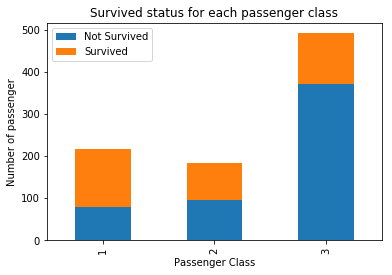

In [5]:
#先看不同等级的乘客获救情况
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'Survived':Survived_1,u'Not Survived':Survived_0})
df.plot(kind='bar',stacked=True) #绘制积累着的柱状图
plt.title(u'Survived status for each passenger class')
plt.xlabel(u'Passenger Class')
plt.ylabel(u'Number of passenger')

plt.show()

这里可以看到,一等级的乘客虽然总人数少,但获救的人数却是最多的.所以乘客等级对获救可能性会有影响

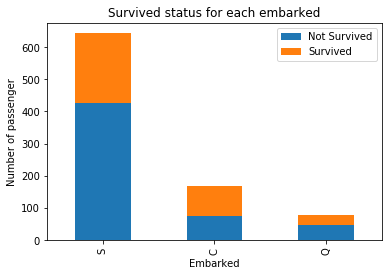

In [6]:
#再来看看不同登舱口的乘客获救情况
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1,u'Not Survived':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title(u'Survived status for each embarked')
plt.xlabel(u'Embarked')
plt.ylabel(u'Number of passenger')
plt.show()

可以看到,虽然C港口的人数不多,但获救的乘客却接近半数,而S的乘客很多,但获救的不到半数,不过整体来看也是获救人数最多的

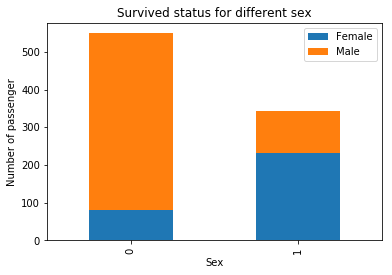

In [7]:
#看下各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'Male':Survived_m,u'Female':Survived_f})
df.plot(kind='bar',stacked=True)
plt.title(u'Survived status for different sex')
plt.xlabel(u'Sex')
plt.ylabel(u'Number of passenger')
plt.show()

这么看来还是女士优先做的比较好,所以性别肯定对获救可能性有影响的,要作为重要特征加入到最后的模型里

/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:638: UserWarning: Unrecognized location "bset". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


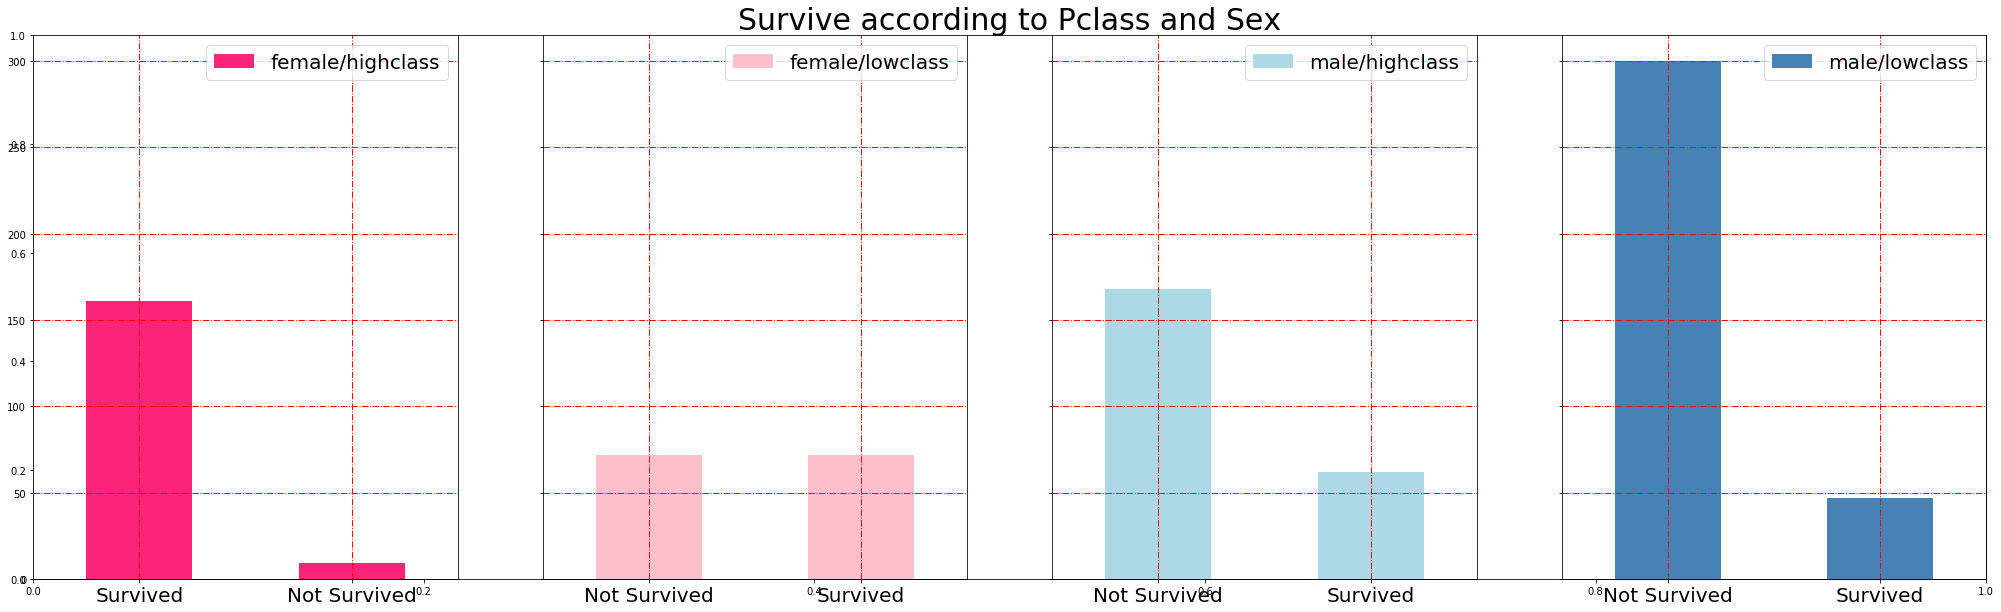

In [8]:
#现在结合乘客等级,乘客性别来再往深入看一下获救情况
fig = plt.figure(figsize=(35,10),facecolor='white')
fig.set(alpha=0.65)
plt.title('Survive according to Pclass and Sex',fontsize=30) #设置整个大图的标题

ax1 = fig.add_subplot(141) #在Figure上添加Axes实例,也就是子图,参数一:子图总行数,参数二:子图总列数,参数三:子图位置
                           #在141表示子图总行数为1行,总列数为4列,位置是第1个位置
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar',label="female highclass",color='#FA2479')
ax1.set_xticklabels([u"Survived",u"Not Survived"], rotation=0,fontsize=20) #set_xticks是设定标签的实际数字，而set_xticklabels则是设定我们希望他显示的结果。rotation就是翻转的角度
ax1.legend([u"female/highclass"],loc='best',fontsize=20) #legend显示图例,loc='best'是让图例自适应用最好的位置
plt.grid(True, linestyle = "-.", color = 'r', linewidth='1')


ax2 = fig.add_subplot(142, sharey=ax1) #与ax1共享y轴
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar',label="female lowclass",color='pink')
ax2.set_xticklabels([u"Not Survived",u"Survived"],rotation=0,fontsize=20)
plt.legend(["female/lowclass"],loc='best',fontsize=20)
plt.grid(True, linestyle = "-.", color = 'r', linewidth='1')

ax3 = fig.add_subplot(143,sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar',label="male highclass",color='lightblue')
ax3.set_xticklabels([u"Not Survived",u"Survived"],rotation=0,fontsize=20)
plt.legend(["male/highclass"],loc='bset',fontsize=20)
plt.grid(True, linestyle = "-.", color = 'r', linewidth='1')

ax4 = fig.add_subplot(144, sharey = ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar',label="male lowclass",color='steelblue')
ax4.set_xticklabels([u"Not Survived",u"Survived"],rotation=0,fontsize=20)
plt.legend(["male/lowclass"],loc = 'best',fontsize=20)
plt.grid(True, linestyle = "-.", color = 'r', linewidth='1')

plt.show()

然后再看一下与堂兄弟和父母同行的乘客的获救情况

In [9]:
#堂兄弟/妹个数 Sibsp
g = data_train.groupby(['Survived','SibSp'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Survived SibSp             
0        0              398
         1               97
         2               15
         3               12
         4               15
         5                5
         8                7
1        0              210
         1              112
         2               13
         3                4
         4                3

In [10]:
#父母/小孩个数 Parch
g = data_train.groupby(['Survived','Parch'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Survived Parch             
0        0              445
         1               53
         2               40
         3                2
         4                4
         5                4
         6                1
1        0              233
         1               65
         2               40
         3                3
         5                1

还没有看出什么特别明显的规律,先暂时放一放,作为备选特征

In [11]:
#ticket是船票编号,英国是unique的,和最后的结果没有太大的关系,不纳入考虑的特征范畴
#cabin只有204个乘客有数值,可以先看一下分布
data_train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
D              3
F2             3
E101           3
C22 C26        3
E25            2
D20            2
B22            2
C52            2
C123           2
D26            2
B5             2
C65            2
E121           2
E8             2
B77            2
C124           2
E33            2
C93            2
F G73          2
D33            2
F4             2
D17            2
B28            2
C125           2
C2             2
E24            2
              ..
C148           1
C46            1
A6             1
A20            1
B101           1
C82            1
A31            1
E46            1
B80            1
E34            1
B86            1
C50            1
C47            1
C111           1
C54            1
C103           1
D19            1
E77            1
D15            1
A5             1
D48            1
B41            1
A24            1
B102           1
D9             1
C95            1
A14            1
C106          

到这里,还是没有通过Cabin看出什么东西.首先这个cabin的值计数比较分散,绝大多数只出现一次,感觉上作为类目,加入特征未必会有效果.

可以来看一下这个cabin的有无,对于survival的分布情况,看有没有影响

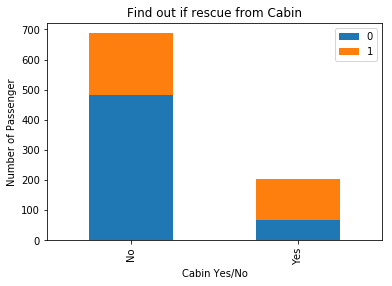

In [12]:
fig = plt.figure(figsize=(20,10),facecolor='white')
fig.set(alpha=0.2)

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df = pd.DataFrame({u'Yes':Survived_cabin,u'No':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"Find out if rescue from Cabin")
plt.xlabel(u"Cabin Yes/No")
plt.ylabel(u"Number of Passenger")
plt.show()

似乎有cabin记录的乘客生存下来的比例稍高,主要是看1占据整体的比例情况.那先试试把这个值分为两类,有cabin值/无cabin值,一会儿加到类别特征好了

In [13]:
那么截止到目前,可以确定乘客身份等级,性别肯定对获救情况有影响,另外
有cabin记录的似乎获救概率高一些,先放一放.
从最突出的数据属性开始看,就是cabin和age都是缺失值,这种有丢失数据的情况实在是对下一步工作影响太大

先说cabin,暂时我们就按照刚才说的,按cabin有无数据,把这个属性处理为Yes,No两种类型

再说Age: 通常遇到缺失值的情况,我们会有几种常见的处理方式
1、如果缺值的样本占总数比例极高,我们可能就直接舍弃了,因为如果作为特征加入的话,可能反而代入noise,影响最后的结果了
2、如果缺值的样本适中,而该属性是非连续值的特征属性(比如类目属性,是反正不是连续型的),那就把NAN作为一个新类别,加到类别特征中
3、如果缺值的样本适中,而该属性是连续值的特征属性,有时候我们会考虑给定一个step(比如这里的age,我们可以考虑每隔2岁或者3岁为一个步长),然后把它离散化,之后把NaN作为一个type加到类目属性中.也就是分为离散的年龄数据桶
4、我们这里用scikit-learn中的RandomForest来拟合一下缺失的年龄数据

SyntaxError: invalid syntax (<ipython-input-13-41ddf32725db>, line 2)

三、数据的处理

1.缺失值处理

In [16]:
from sklearn.ensemble import RandomForestRegressor

#使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
    
    #把已经有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare','Parch','SibSp','Pclass']]
    
    #乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    
    #y即目标年龄
    y = known_age[:,0]
    
    #x即特征属性值
    X = known_age[:,1:]
    
    #fit到RandomForestRegressor中
    rfr = RandomForestRegressor(random_state=0, n_estimators = 2000, n_jobs=-1) 
    # n_estimators决策树的个数，越多越好，但是性能就会越差，至少100左右（具体数字忘记从哪里来的了）可以达到可接受的性能和误差率。 
    #n_jobs并行job个数1=不并行   n：n个并行   -1：CPU有多少core，就启动多少job
    rfr.fit(X,y)
    
    #用得到的模型进行未知年龄结果预测
    predicteAges = rfr.predict(unknown_age[:, 1::])
    
    #用得到的预测结果填补原来缺失数据
    df.loc[ (df.Age.isnull()),'Age' ] = predicteAges
    return df,rfr

#处理一下有缺失的Cabin,有Cabin就是Yes,没有Cabin就是No
#df.loc[行标签,列标签]
#df.loc['a':'b'] 选取ab两行数据
#df.loc[:,'one'] 选取one列的数据
#本例子中,是选择df.Cabin是空的行,然后选择cabin这一列,把空的行的位置用yes填充进去
def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()),'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train ,rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
data_train
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


In [17]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


现在就可以看到age和cabin都补全了

In [18]:
因为逻辑回归建模时,需要输入的特征都是数值型特征,我们通常会先对类目型的特征进行因子化/one-hot编码(独热编码)

补充:独热编码(One-Hot Encoding),举个简单的例子:
性别有三种:男、女、其它
年级有四种:一年级,二年级,三年级,四年级
那么各自对应的独热编码是
性别:男(100)、女(010),其它(001)
年级:一年级(1000)、二年级(0100)、三年级(0010),四年级(0001)
当输入 性别:男、年级:二年级
        那么得到的独热编码为:1000100
            
我们使用pandas的get_dummies来完成这个工作,并拼接在原来的data_train之上

SyntaxError: invalid syntax (<ipython-input-18-745088201809>, line 3)

2.对特征进行因子化处理

In [19]:
#因为逻辑回归建模时,需要输入的特征都是数值型特征
#我们首先对类目型的特征进行因子化(也就是用独热编码)
#以Cabin为例子,取值为Yes或者No

dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin') #
#pd.get_dummies()，则恰将 string 转换为 integers 类型
#一种常用于统计建模或机器学习的转换方式是：将分类变量（categorical variable）转换为“哑变量矩阵”（dummy matrix）或“指标矩阵”（indicator matrix）。如果DataFrame的某一列中含有k个不同的值，则可以派生出一个k列矩阵或DataFrame（其值全为1和0）。pandas有一个get_dummies函数可以实现该功能

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix = 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix = "Sex")

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix = "Pclass")

#把上面转好的和原来的表连起来
df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis = 1) #axis： 需要合并链接的轴，0是行，1是列 

#整合的表该删除列的都删除,就剩下处理好的,inplace=True 采用inplace=True之后，原数组原数组直接就被替换,也就是原数组名（如2和3情况所示）对应的内存值直接改变
df.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'], axis = 1, inplace=True) 

df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


我们还需要做一些处理
先看一下Age和Fare两个属性,数值变化幅度是很大的
如果大家了解逻辑回归与梯度下降的话,会知道,各属性值之间的规模(scale)差距太大,将对收敛速度造成很大的影响,甚至不收敛

所以我们先用scikit-learn里面的preprocessing模块对这两个属性做一个scaling(数据进行标准化),其实就是将一些变化幅度较大的特征化到[-1,1]之内

补充:Scikit-Learn是用Python开发的机器学习库，其中包含大量机器学习算法、数据集，是数据挖掘方便的工具


3.属性(特征)标准化处理

In [20]:
#接下来我们要做一些数据预处理的工作,比如scaling.将一些变化幅度较大的特征标准化到[-1,1]之间
#这样可以加速logistic regression的收敛
import sklearn.preprocessing as preprocessing

#preprocessing.StandardScaler()它可以在训练数据集上做了标准转换操作之后，把相同的转换应用到测试训练集中
#这是相当好的一个功能。可以对训练数据，测试数据应用相同的转换，以后有新的数据进来也可以直接调用，不用再重新把数据放在一起再计算一次了
scaler = preprocessing.StandardScaler()   

#调用fit方法，根据已有的训练数据创建一个标准化的转换器,这里是根据Age来创建标准化转化器
#age_scale_param = preprocessing.StandardScaler().fit(df['Age'])

#fit_transform先拟合数据，再标准化 
#df['Age']这个是要拟合的数据
#age_scale_param这个是标准化的转化器
df['Age_scaled'] =scaler.fit_transform(df['Age'].reshape(-1,1))

#fare_scale_param = preprocessing.StandardScaler() .fit(df['Fare'])
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].reshape(-1,1))
df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.426384,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787722,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148655,-0.042956


四:构建模型及预测

In [21]:
#我们把需要的feature字段取出来,转成numpy格式,使用scikit-learn中的LogisticRegression建模
from sklearn import linear_model

#用正则取出我们要的属性值: |符号的意识是去匹配,然后取出来
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')  

#DataFrame.as_matrix(columns=None) 意思是 :把DataFrame(数据框)转为Numpy-array(narray)numpy数组
train_np = train_df.as_matrix()

#y是Survived结果
y = train_np[:, 0] #所有行都要了,然后要第0列

#X是特征属性值
X = train_np[:, 1:] #所有行都要了,然后从第1列开始(包括第1列)后面的列也都要

#fit到RandomForestRegressor之中
#penalty=l1 :代价函数,这里选择使用L1
#C :C越大，那么表示每个式子中左部分的正则化在整个代价函数中占得比重就更小，默认为1.0，必须是正的浮点数(a positive float)
#tol :停止条件.默认为float,default:1e-4
#详细了解进入链接:https://www.jianshu.com/p/bbdeb356057e
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)

#clf.fit() 就是把训练集中X和y分别放进去模型中使用
clf.fit(X,y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [22]:
X.shape

(891, 14)

In [24]:
#下面对训练集做一样的操作
#先看一下训练集的缺失情况
data_test = pd.read_csv("/Users/bindo/Desktop/Titanic/test.csv")
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


然后发现训练集的Age、Fare、Cabin三个有缺失的情况

In [25]:
#把Fare丢失的补充为0,票价没有填写就当作0好了
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0

#Cabin的缺失,我们前面定义了set_Cabin_type来把有cabin的认为是yes,没有cabin的认为是no,所以这里可以直接使用
data_test = set_Cabin_type(data_test)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [26]:
#到这里为止,只剩下age还有缺失值,那么对于age这样的连续型缺失值,我们也是用RandomForestRegressor模型来填补
#对于Age的缺失,我们前面定义了set_missing_ages,在这里可以直接套用过了
data_test ,rfr = set_missing_ages(data_test)

data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,No,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,No,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,No,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,No,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,No,S


再看一下训练集,这时候已经补全了数据

In [27]:
#然后也是一样的,做因子特征化
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix = 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix = 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix = 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix = 'Pclass')

#因子化之后,也是一样的,把原来对应的旧的列去掉
#先连接起来
df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
#然后丢掉原来的对应的列
df_test.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'], axis=1, inplace=True)
#最后就是特征标准化,也是因为我们看到Fare和Age的值之间有的跨越很大了,需要归一化到[-1,1]范围内
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].reshape(-1,1))
df_test['Fare_s'] = scaler.fit_transform(df_test['Fare'].reshape(-1,1))

df_test.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_s
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.367101,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.331237,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.488200,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.211380,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.597035,-0.416740


In [32]:
#都处理好数据之后,可以放到模型里面了
#用正则把需要的特征提取出来放到新建的test中
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
#因为我们前面已经用训练集得到了clf的模型,那么在测试集中,是没有Survived这一项的,需要我们用clf进行预测
predictions = clf.predict(test)
#然后我们把结果弄成一个数据框的形式,符合题目的要求
result = pd.DataFrame({
    'PassengerId':data_test['PassengerId'].as_matrix(),
    'Survived':predictions.astype(np.int32)
})
#把最后的结果到处到csv格式文件中
result.to_csv("logistic_regression_predictions.csv")


In [33]:
pd.read_csv("logistic_regression_predictions.csv")

,Unnamed: 0,PassengerId,Survived
0,0,892,0
1,1,893,0
2,2,894,0
3,3,895,0
4,4,896,1
5,5,897,0
6,6,898,1
7,7,899,0
8,8,900,1
9,9,901,0


到这里提交第一次,score=0.77511,还可以,因为都还没有进行任何调优等,只是一个很基础的
那么得到模型之后,就需要判定模型所处状态了

五、判定模型所处状态(欠拟合/过拟合)

In [ ]:
有一个很可能发生的问题是,我们不断做feature engineering,产生的特征越来越多,用这些特征去训练模型,
会对我们的训练集拟合得越来越好,同时也逐渐丧失泛化能力,从而在面对新的需要预测的数据时,表现不好,也就是出现过拟合

从另一个角度上说,如果模型在待测的数据上表现不佳,除了过拟合,也有可能是欠拟合.也就是其实就算面对训练集也拟合的不是很好

在机器学习中,面对过拟合和欠拟合两种情形,优化方式不一样.
--过拟合:
    做一下feature selection,挑出比较好的feature的subset(子集)来做training;
    提供更多的数据,从而弥补原始数据的bias(偏差)问题,那么学习到的model也会更准确
--欠拟合:
    通常需要更多的feature,更复杂的模型来提高准确度
    
著名的learning curve(学习曲线)可以帮助判定我们的模型现在所处的状态.
横坐标:样本数
纵坐标:训练集和交叉验证集(Cross Validation)上的错误率
图1:过拟合(overfitting/high variace)
图2:欠拟合(underfitting/high bias)

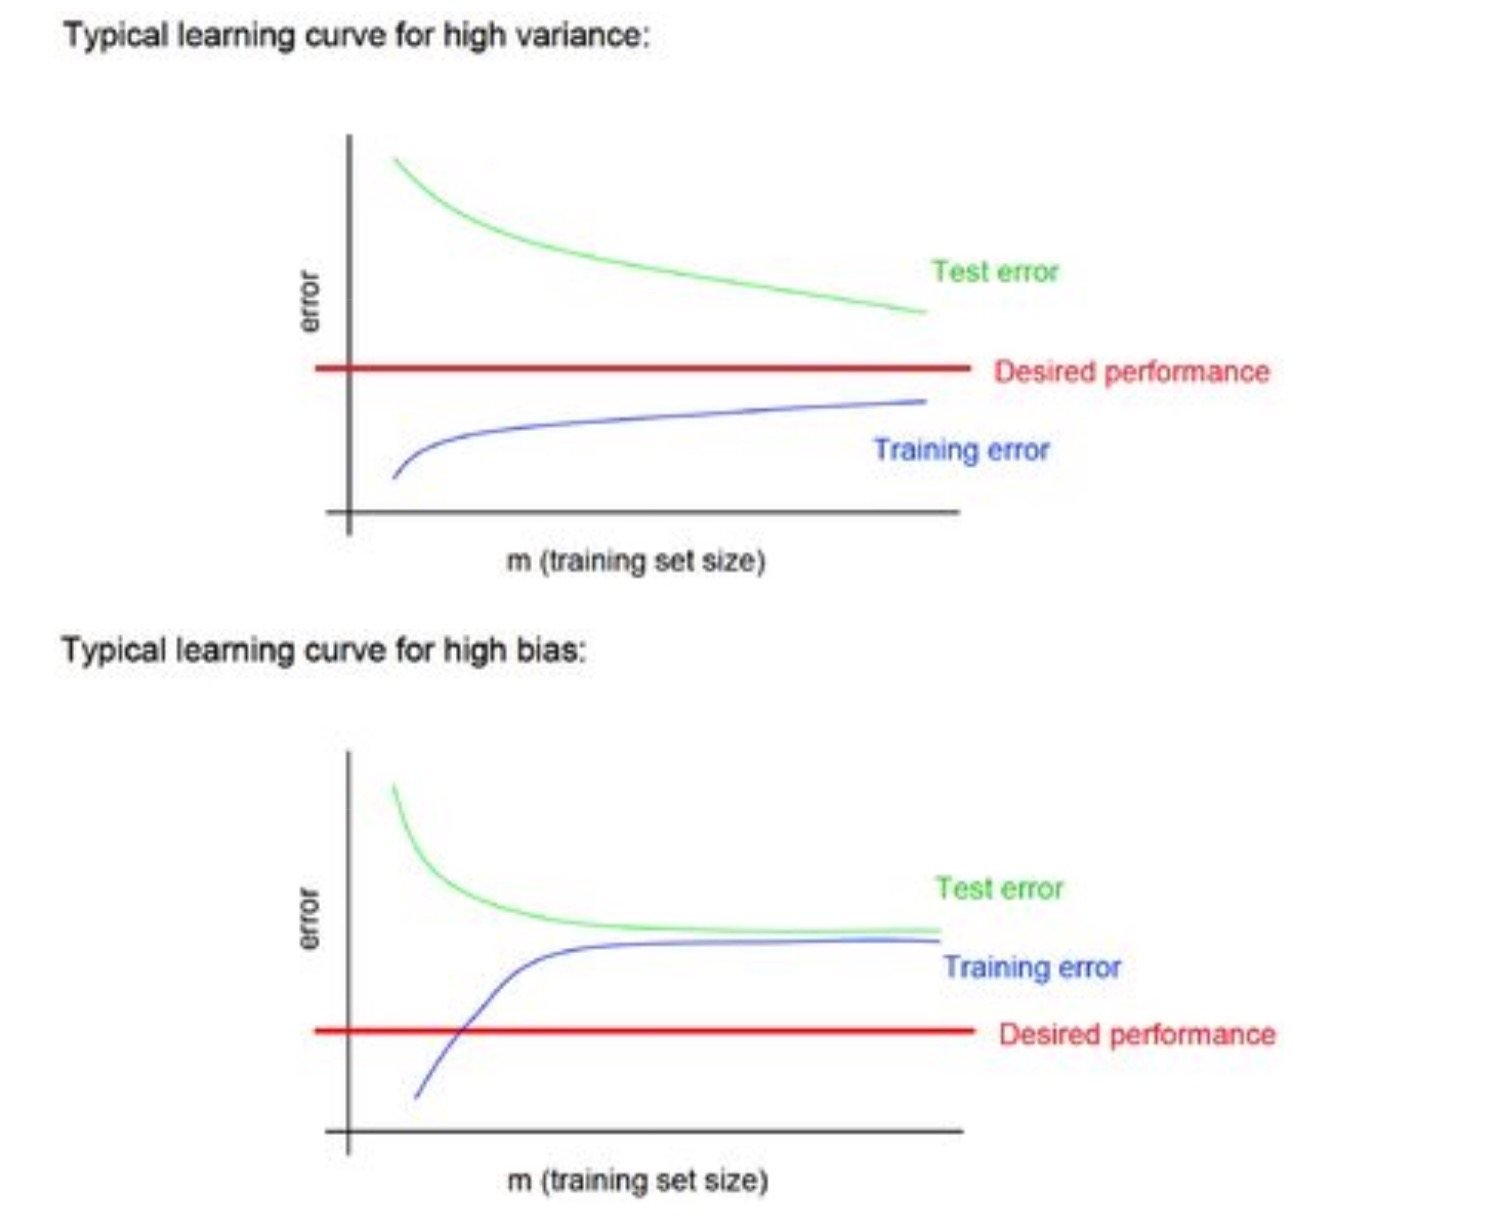

In [34]:
from IPython.display import Image
Image(filename="/Users/bindo/Desktop/WechatIMG820.jpeg",width=600,height=600)


In [ ]:
我们也可以把错误了换成准确率,得到另一种形式的learning curve(sklearn里面是这么做的)

回来我们的问题,我们用scikit-learn里面的learning-curve来帮我们分辨上面得到的模型的状态.

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


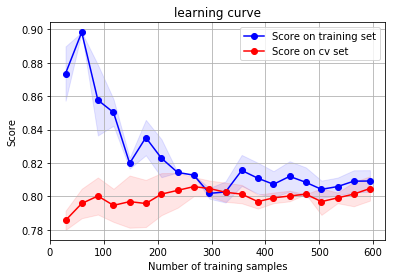

(0.8065696844854024, 0.018258876711338634)

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

#我们用sklearn的learning_curve得到training_score和cv_score,使用matplotlib画出learning curve
def plot_learning_curve(estimator,title,X,y,ylim=None, cv=None,n_jobs=1,train_sizes=np.linspace(0.05, 1. ,20),verbose=0, plot=True):
    """
    画出data在某模型上的learning curve
    参数解释
    ----------
    estimator : 你用的分类器
    title : 表格的标题
    X : 输入的feature, numpy类型
    y : 输入的target vector(目标向量)
    ylim : tuple格式的(ymin,ymax),设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候,数据分成的份数,其中一份作为cv集, 其余n-1份作为training(默认为3份)
    n_jobs : 并行的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"Number of training samples")
        plt.ylabel(u"Score")
        plt.gca().invert_yaxis() #翻转坐标轴
        plt.grid() #显示网格
        
        #plt.fill_between颜色填充
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="blue")  
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1 ,color="red")
        #画出两条线
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"Score on training set")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"Score on cv set")
        #显示图例
        plt.legend(loc = "best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff
plot_learning_curve(clf,u"learning curve", X,y)

In [ ]:
在实际数据上看,我们得到的learning curve并没有理论推导的那么平滑,但大致可以看出来:
    训练集和交叉验证集上的得分曲线走势还是符合预期的.
    
目前的曲线看来,我们的模型并不是过拟合,因为过拟合一般是训练集得分很高,cv得分很低,中间会有比较大的空隙

因此我们可以再试着做一些特征工程的工作,添加一些新产出的特征或者我们可以组合新的特征到模型中

接下来我们看下如何优化baseline系统

In [ ]:
我们可以思考下,还有那些特征可以再挖掘挖掘
1.比如说Name和Ticket两个属性一开始就被我们舍弃了
2.比如说Age缺失,用RandomForest拟合,本身也不是非常靠谱的事情,但确实是一种方法
3.另外,以我们日常的经验,小孩和老人也可能得到更多一点的照顾,那么我们把年龄作为一个连续值,给一个固定的系数,
    似乎体现不出两头受照顾的实际情况.所以说不定我们把年龄离散化,按区段分作类别属性,会更合适一些
    
那怎么样才知道,哪些地方可以优化,哪些优化的方法是有希望的呢?

那我们就要做:交叉验证(cross validation)!!!!
    why?
        因为测试集里面肯定是没有Survived这个字段的,因为这个是要预测的字段.那么我们就无法在这份数据上评定我们算法
        在该场景下的效果.
        我们通常情况下是这样做cross validation:把训练集分成两部分,一部分用于训练,一部分用来看算法的效果
            how?
            我们可以用scikit-learn的cross_validation来完成

六、交叉验证做优化

In [36]:
#在做交叉验证之前,我们先看下目前得到的模型的系数,因为系数和各个特征最后对模型的贡献程度(判定能力的强弱)的正相关的
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(clf.coef_.T)}) #cofe是模型的参数

,coef,columns
0,[-0.34423540899418686],SibSp
1,[-0.10491597536926696],Parch
2,[0.0],Cabin_No
3,[0.9021081952996205],Cabin_Yes
4,[0.0],Embarked_C
5,[0.0],Embarked_Q
6,[-0.417264049806612],Embarked_S
7,[1.9565705024115327],Sex_female
8,[-0.6774210142735136],Sex_male
9,[0.3411589682244549],Pclass_1


In [ ]:
上面的系数和最后的结果是一个正相关的关系,我们先看下哪些权重绝对值非常大的feature:
    Sex : 如果是female,系数比male大蛮多的,就是female会极大提高最后获救的概率,而male会很大成都拉低这个概率
    Pclass : 一等舱乘客最后获救的概率会上升,而乘客等级为三的话,会极大拉低这个概率
    Cabin : Cabin是yes的会很大程度拉升最后获救的概率
        --上面有做过一个图是关于有无cabin的获救情况的,看到就算有cabin的乘客有有一部分遇难了.估计这个属性我们还挖掘不够
    Age : Age系数是一个负相关的,也就是我们的模型认为,age越小,越有获救的可能.但大多数现实生活中,老人也是优先的
    Embarked : 如果是S港口等船,那么会很大程度拉低获救的概率,另外两个港口还想咩有什么作用(这个实际上很奇怪,因为我们从更之前的统计图上,并没有看到S港口的获救率很低,所以也许可以考虑把登船港口这个feature去掉)
    Fare : 有小幅度的正相关(并不意味这个feature作用不大,有可能是我们细化的程度还不够,举个例子,说不定我们得对它离散化,再分至各个乘客等级上?)
        
到这里我们观察的差不多了,有了一些想法.但是怎样才能知道,哪些优化的方法是有希望的呢?
        那就是要靠 “交叉验证”

In [37]:
from sklearn import cross_validation

#简单看下打分的情况
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.as_matrix()[:,1:]
y = all_data.as_matrix()[:,0]
print (cross_validation.cross_val_score(clf, X, y, cv=5))
#cv：最简单的方式是使用函数cross_val_score，当cv为数字时，默认采用的是KFold或者stratifiedKFold

[0.81564246 0.81564246 0.78651685 0.78651685 0.81355932]


In [38]:
#分割数据
#train_test_split是交叉验证中常用的函数，功能是从样本中随机的按比例选取train data和testdata，形式为：
#X_train,X_test, y_train, y_test =cross_validation.train_test_split(train_data,train_target,test_size=0.4, random_state=0)
#train_data：所要划分的样本特征集
#train_target：所要划分的样本结果
#test_size：样本占比，如果是整数的话就是样本的数量
#random_state：是随机数的种子。
#随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。
#随机数的产生取决于种子，随机数和种子之间的关系遵从以下两个规则：种子不同，产生不同的随机数；种子相同，即使实例不同也产生相同的随机数。
split_train, split_cv = cross_validation.train_test_split(df,test_size=0.3,random_state=0)
#split_train :当作训练集
#split_cv :当作测试集
#要被随机划分出训练集和测试集的是df(原始训练集), test_size=0.3 说明cv的样本是占据整体30%,random_state=0

#把原始训练集分出来70%当作新的训练集之后,整理下字段梳理为 train_df
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*') 

#生成模型
#1.把模型的参数设置好
clf = linear_model.LogisticRegression(C=1.0, penalty='l1',tol=1e-6)
#2.用新的整理好字段的训练集 train_df去训练模型
#train_df.as_matrix()[:,1:] 这个是告诉模型特征所在行列
#train_df.as_matrix()[:,0] 这个是告诉模型训练集结果是那一列
clf.fit(train_df.as_matrix()[:,1:], train_df.as_matrix()[:,0])

#对cross validation数据进行预测
#1.把原始训练集分出来30%当作新的测试集之后,整理下字段梳理为cv_df
cv_df = split_cv.filter(regex = 'Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
#2.把cv_df的特征都在哪一列告诉模型,进行预测
predictions = clf.predict(cv_df.as_matrix()[:,1:])
#3.有一个条件语句进行筛选,就是判断预测结果不在cv_df的真实结果中的,拿出来这部分测试集的东西,然后下面才能继续看为什么这部分内容我们模型预测不对
split_cv[ predictions != cv_df.as_matrix()[:,0]  ]

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
298,299,1,41.574877,0,0,30.5000,0,1,0,0,1,0,1,1,0,0,0.875600,-0.034314
14,15,0,14.000000,0,0,7.8542,1,0,0,0,1,1,0,0,0,1,-1.148655,-0.490280
803,804,1,0.420000,0,1,8.5167,1,0,1,0,0,0,1,0,0,1,-2.145556,-0.476941
474,475,0,22.000000,0,0,9.8375,1,0,0,0,1,1,0,0,0,1,-0.561380,-0.450347
642,643,0,2.000000,3,2,27.9000,1,0,0,0,1,1,0,0,0,1,-2.029569,-0.086664
55,56,1,44.064830,0,0,35.5000,0,1,0,0,1,0,1,1,0,0,1.058386,0.066360
587,588,1,60.000000,1,1,79.2000,0,1,1,0,0,0,1,1,0,0,2.228178,0.946246
740,741,1,38.426632,0,0,30.0000,0,1,0,0,1,0,1,1,0,0,0.644490,-0.044381
839,840,1,50.910950,0,0,29.7000,0,1,1,0,0,0,1,1,0,0,1.560956,-0.050421
301,302,1,23.313683,2,0,23.2500,1,0,0,1,0,0,1,0,0,1,-0.464943,-0.180290


In [39]:
#上面得到预测集中,我们没有正确预测的内容,为了更好的思考为什么不能正确预测,我们先用这个错误预测的测试集的部分
#返回去得到相应的原始数据的内容,用PassengeerId就可以了
#因为原始数据是没有处理过的,我们的预测集是处理过了,不能很好的再进行思考
origin_data_train = pd.read_csv("/Users/bindo/Desktop/Titanic/train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.as_matrix()[:,0]]['PassengerId'].values)]  
bad_cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.00,1,0,4136,9.8250,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.00,0,0,A/5 3540,8.0500,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


In [ ]:
对比bad  case ,我们仔细看看我们预测错的样本,到底是哪些特征有问题,是哪里还没有处理好?

我们随便列一些可能可以做优化的操作
1.我们之前为了解决Age缺失的问题,用了拟合的方法,或许我们可以不用这个拟合方法,而是根据名称中的[Mr]、[Mrs],[Miss]等的平均值进行填充     
2.Age不作为一个连续值属性,而是使用一个步chang进行离散化,变成离散的类目feature
3.Cabin再细化一些,我们之前对待Cabin只是分null和not null.细化来看,对于有记录的Cabin属性,我们将其氛围前面的字母部分(有可能是位置和船层之类的信息) 
    和后面的数字部分(应该是房间号,有意思的事情是,如果你仔细看看原始数据,你会发现,这个值大的情况下,似乎获救的可能性高一些)
4.Pclass和Sex两个是肯定对是否生存有影响的.或许我们可以做一个组合属性来试试,这也是另外一种程度的细化.
5.单独加一个child的字段,Age<=12,设为1,其余为0 (可以自己再看看数据,确实小朋友的优先程度很高)
6.如果名字里面有[Mrs],而Parch>1的,我们假设她可能是一个母亲,应该获救的概率也会提高,因此多加一个Mother字段,此种情况下设为1,其余为0
7.登船港口可以优先考虑去掉试试(Q、C本来就没有权重,S有点诡异)
8.把堂兄弟/兄妹和Parch还有自己 个数加在一起组一个Fanmily_size字段(考虑到大家族可能对最后的结果有影响)
9.Name是一个我们一直没有触碰的属性,我们可以做一些简单的处理,比如说男性中带某些字眼的("Capt"、"Don"、"Major"、"Sir")可以统一到一个Title,女性也一样

大家可以接着往下挖掘,可能还可以想到更多可以细挖的部分.我这里先列这些了,然后我们可以使用手头上的train_df 和cv_df开始试验这些feature engineering的trick是否有效了

In [40]:
#小彩蛋:简单介绍一下上面9.Name的简单处理
data_train[data_train['Name'].str.contains("Major")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.50,Yes,S
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.55,Yes,S


In [41]:
data_train = pd.read_csv("/Users/bindo/Desktop/Titanic/train.csv")
#根据上面4.我们组合一个新的特征,叫做Sex_Pclass, 样式应该为 Sex_Pclass 比如:femal_1 即等级为一等的女性乘客
data_train['Sex_Pclass'] = data_train.Sex + '_' + data_train.Pclass.map(str)

from sklearn.ensemble import RandomForestRegressor

#使用 RandomForestClassifier 填补缺失的年龄属性 在这里我们还是把年龄当作是连续的,还没有弄成离散的
#也是依旧使用随机森林进行缺失年龄的预测
#我们先定义好这个思路先,到后面直接把df放进去就可以了
def set_missing_ages(df):
    #原来的训练集df的特征看需要什么就拿出来,放到age_df,准备用这个集合来用于预测缺失年龄
    age_df = df[['Age','Fare','Parch','SibSp','Pclass']]
    
    #把乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknow_age = age_df[age_df.Age.isnull()].as_matrix()
    
    #设定y是想要知道的缺失年龄,即目标年龄
    y = known_age[:,0]
    #设定X是特征
    X = known_age[:, 1:]
    
    #调整好随机森林的参数
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    #然后让随机森林算法根据给出的特征和结果,先得到模型先,也就是让模型去fit我们的数据
    rfr.fit(X,y)
    
    #然后用得到的模型对缺失年龄的部分,预测年龄
    predictedAges = rfr.predict(unknow_age[:, 1::])
    
    #用得到的预测结果填充原来的缺失部分
    df.loc[ (df.Age.isnull()), 'Age'] = predictedAges
    
    #返回处理好的之前cross validation预测结果错误的对应回去的原始测试集的补充好年龄后的完成测试集,以及模型
    return df,rfr
    

In [42]:
#然后Cabin还是沿用之前的处理思路,先分成有Cabin和没有Cabin
def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin'] = 'Yes'
    df.loc[ (df.Cabin.isnull()), 'Cabin'] = 'No'
    return df

In [43]:
#把训练集格子放进去定义好的函数
data_train,rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

In [44]:
#跟之前一样的对特征进行独热编码
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix = 'Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix = 'Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix='Pclass')
dummies_Sex_Pclass = pd.get_dummies(data_train['Sex_Pclass'], prefix='Sex_Pclass')

In [45]:
#把得到的独热编码处理后的特征先和data_train连接起来
df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass, dummies_Sex_Pclass], axis=1)
#把进行过独热编码处理的旧特征去掉
df.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked','Sex_Pclass'], axis=1, inplace=True)

df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,...,Sex_male,Pclass_1,Pclass_2,Pclass_3,Sex_Pclass_female_1,Sex_Pclass_female_2,Sex_Pclass_female_3,Sex_Pclass_male_1,Sex_Pclass_male_2,Sex_Pclass_male_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,4,1,35.000000,1,0,53.1000,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
9,10,1,14.000000,1,0,30.0708,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [56]:
#还是再对Age和Fare进行标准化
import sklearn.preprocessing as preprocessing

#preprocessing.StandardScaler()它可以在训练数据集上做了标准转换操作之后，把相同的转换应用到测试训练集中
#这是相当好的一个功能。可以对训练数据，测试数据应用相同的转换，以后有新的数据进来也可以直接调用，不用再重新把数据放在一起再计算一次了
scaler = preprocessing.StandardScaler()   

#调用fit方法，根据已有的训练数据创建一个标准化的转换器,这里是根据Age来创建标准化转化器
#age_scale_param = preprocessing.StandardScaler().fit(df['Age'])

#fit_transform先拟合数据，再标准化 
#df['Age']这个是要拟合的数据
#age_scale_param这个是标准化的转化器
df['Age_scaled'] =scaler.fit_transform(df['Age'].reshape(-1,1))

#fare_scale_param = preprocessing.StandardScaler() .fit(df['Fare'])
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].reshape(-1,1))
df.head()


ValueError: Expected 2D array, got 1D array instead:
array=[22.         38.         26.         35.         35.         23.83895259
 54.          2.         27.         14.          4.         58.
 20.         39.         14.         55.          2.         32.06649305
 31.         29.51820514 35.         34.         15.         28.
  8.         38.         29.51820514 19.         22.38011324 27.94720616
 40.         36.10804822 35.2958243  66.         28.         42.
 22.87630686 21.         18.         14.         40.         27.
 27.94720616  3.         19.         30.70572678 33.12898535 35.2958243
 23.45968333 18.          7.         21.         49.         29.
 65.         44.06483036 21.         28.5         5.         11.
 22.         38.         45.          4.         41.20008848 17.09991595
 29.         19.         17.         26.         32.         16.
 21.         26.         32.         25.         27.94720616 30.70572678
  0.83       30.         22.         29.         23.32262739 28.
 17.         33.         16.         30.70572678 23.         24.
 29.         20.         46.         26.         59.         30.70572678
 71.         23.         34.         34.         28.         27.94720616
 21.         33.         37.         28.         21.         27.51545426
 38.         33.55117591 47.         14.5        22.         20.
 17.         21.         70.5        29.         24.          2.
 21.         30.70572678 32.5        32.5        54.         12.
 35.2958243  24.         25.78337698 45.         33.         20.
 47.         29.         25.         23.         19.         37.
 16.         24.         25.34409583 22.         24.         19.
 18.         19.         27.          9.         36.5        42.
 51.         22.         55.5        40.5        29.78279613 51.
 16.         30.         25.52340334 10.86986696 44.         40.
 26.         17.          1.          9.         26.03188214 45.
 49.5542756  28.         61.          4.          1.         21.
 56.         18.          7.30954704 50.         30.         36.
 10.86986696 31.71894048  9.          1.          4.         46.24976824
 33.12898535 45.         40.         36.         32.         19.
 19.          3.         44.         58.         35.2958243  42.
 35.2958243  24.         28.         10.86986696 34.         45.5
 18.          2.         32.         26.         16.         40.
 24.         35.         22.         30.         31.09342985 31.
 27.         42.         32.         30.         16.         27.
 51.         27.94720616 38.         22.         19.         20.5
 18.          7.30954704 35.         29.         59.          5.
 24.         31.10838452 44.          8.         19.         33.
 20.80015413 33.12898535 29.         22.         30.         44.
 25.         24.         37.         54.         29.78279613 29.
 62.         30.         41.         29.         34.62028571 30.
 35.         50.         35.2958243   3.         52.         40.
 35.2958243  36.         16.         25.         58.         35.
 36.87489821 25.         41.         37.         35.2958243  63.
 45.         35.05181757  7.         35.         65.         28.
 16.         19.         57.74249226 33.         30.         22.
 42.         22.         26.         19.         36.         24.
 24.         41.20008848 23.5         2.         41.57487718 50.
 35.2958243  23.31368333 19.         42.57451554 30.70572678  0.92
 28.57888393 17.         30.         30.         24.         18.
 26.         28.         43.         26.         24.         54.
 31.         40.         22.         27.         30.         22.
 10.86986696 36.         61.         36.         31.         16.
 23.31368333 45.5        38.         16.         31.42587794 27.94720616
 29.         41.         45.         45.          2.         24.
 28.         25.         36.         24.         40.         26.68916849
  3.         42.         23.         59.96916448 15.         25.
 29.51820514 28.         22.         38.         22.38011324 22.38011324
 40.         29.         45.         35.         33.12898535 30.
 60.         22.87630686 35.2958243  24.         25.         18.
 19.         22.          3.         31.94479345 22.         27.
 20.         19.         42.          1.         32.         35.
 27.94720616 18.          1.         36.         19.89558113 17.
 36.         21.         28.         23.         24.         22.
 31.         46.         23.         28.         39.         26.
 21.         28.         20.         34.         51.          3.
 21.          7.30954704 27.94720616 20.68131488 33.         35.05181757
 44.         30.70572678 34.         18.         30.         10.
 27.94720616 21.         29.         28.         18.         29.78279613
 28.         19.         35.2958243  32.         28.         26.68916849
 42.         17.         50.         14.         21.         24.
 64.         31.         45.         20.         25.         28.
 23.47643239  4.         13.         34.          5.         52.
 36.         24.10899881 30.         49.         30.70572678 29.
 65.         44.06001827 50.         35.2958243  48.         34.
 47.         48.         30.70572678 38.         35.05181757 56.
 19.89558113  0.75       29.78279613 38.         33.         23.
 22.         44.65953056 34.         29.         22.          2.
  9.         35.05181757 50.         63.         25.          7.30954704
 35.         58.         30.          9.         24.10899881 21.
 55.         71.         21.         18.19479484 54.         25.7554753
 25.         24.         17.         21.         26.82073281 37.
 16.         18.         33.         49.8994093  28.         26.
 29.         30.70572678 36.         54.         24.         47.
 34.         34.17374861 36.         32.         30.         22.
 29.51820514 44.         22.87630686 40.5        50.         38.5155
 39.         23.          2.         22.87630686 17.          8.01370298
 30.          7.         45.         30.         24.33021696 22.
 36.          9.         11.         32.         50.         64.
 19.         32.79502428 33.          8.         17.         27.
 26.3814249  22.         22.         62.         48.         38.5155
 39.         36.         35.2958243  40.         28.         30.70572678
 30.70572678 24.         19.         29.         22.87630686 32.
 62.         53.         36.         35.2958243  16.         19.
 34.         39.         20.07016773 32.         25.         39.
 54.         36.         29.04293865 18.         47.         60.
 22.         30.70572678 35.         52.         47.         27.45639428
 37.         36.         24.40235514 49.         29.51820514 49.
 24.         27.94720616 37.51615833 44.         35.         36.
 30.         27.         22.         40.         39.         27.86873699
 33.12898535 35.2958243  35.         24.         34.         26.
  4.         26.         27.         42.         20.         21.
 21.         61.         57.         21.         26.         19.89558113
 80.         51.         32.         38.83477484  9.         28.
 32.         31.         41.         26.68916849 20.         24.
  2.         29.56889809  0.75       48.         19.         56.
 31.10838452 23.         27.94720616 18.         21.         26.3814249
 18.         24.         27.94720616 32.         23.         58.
 50.         40.         47.         36.         20.         32.
 25.         27.51545426 43.         39.08817814 40.         31.
 70.         31.         35.05181757 18.         24.5        18.
 43.         36.         23.47643239 27.         20.         14.
 60.         25.         14.         19.         18.         15.
 31.          4.         29.56889809 25.         60.         52.
 44.         19.89558113 49.         42.         18.         35.
 18.         25.         26.         39.         45.         42.
 22.         17.09991595 24.         49.8994093  48.         29.
 52.         19.         38.         27.         27.30887391 33.
  6.         17.         34.         50.         27.         20.
 30.         19.89558113 25.         25.         29.         11.
 35.05181757 23.         23.         28.5        48.         35.
 27.94720616 27.94720616 38.42663175 36.         21.         24.
 31.         70.         16.         30.         19.         31.
  4.          6.         33.         23.         48.          0.67
 28.         18.         34.         33.         24.33021696 41.
 20.         36.         16.         51.         39.17490238 30.5
 33.55117591 32.         24.         48.         57.         29.51820514
 54.         18.         35.2958243   5.         19.89558113 43.
 13.         17.         29.         16.1939502  25.         25.
 18.          8.          1.         46.         35.2958243  16.
 10.86986696 50.38328427 25.         39.         49.         31.
 30.         30.         34.         31.         11.          0.42
 27.         31.         39.         18.         39.         33.
 26.         39.         35.          6.         30.5        38.83477484
 23.         31.         43.         10.         52.         27.
 38.         27.          2.         35.09787898 29.56889809  1.
 35.2958243  62.         15.          0.83       22.87630686 23.
 18.         39.         21.         30.70572678 32.         50.91095013
 20.         16.         30.         34.5        17.         42.
 10.86986696 35.         28.         43.96476448  4.         74.
  9.         16.         44.         18.         45.         51.
 24.         22.87630686 41.         21.         48.         10.86986696
 24.         42.         27.         31.         25.97788916  4.
 26.         47.         33.         47.         28.         15.
 20.         19.         27.94720616 56.         25.         33.
 22.         28.         25.         39.         27.         19.
 16.1939502  26.         32.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [47]:
#然后训练模型
from sklearn import linear_model
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*') 
train_np = train_df.as_matrix()

y = train_np[:,0]
X = train_np[:,1:]
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X,y)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [59]:
#载入训练集
data_test = pd.read_csv("/Users/bindo/Desktop/Titanic/test.csv")
#对Fare做一下处理如果为null那就令其为0
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
#给训练集添上新的组合特征(Sex_Pclass)
data_test['Sex_Pclass'] = data_test.Sex + "_" + data_test.Pclass.map(str)

#接着我们对test_data做和train_data中一致的特征变换
#首先用同样的RandomForestRegressor模型填充上丢失的年龄
tmp_df = data_test[['Age','Fare','Parch','SibSp','Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
#跟进特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix = 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Pclass'], prefix = 'Pclass')
dummies_Sex_Pclass = pd.get_dummies(data_test['Sex_Pclass'],prefix = 'Sex_Pclass')

df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass, dummies_Sex_Pclass], axis=1)   
df_test.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked','Sex_Pclass'], axis=1,inplace=True)

df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].reshape(-1,1))
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].reshape(-1,1))
df_test

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Pclass_1,Pclass_2,Pclass_3,...,Pclass_2,Pclass_3,Sex_Pclass_female_1,Sex_Pclass_female_2,Sex_Pclass_female_3,Sex_Pclass_male_1,Sex_Pclass_male_2,Sex_Pclass_male_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0.307521,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1.256241,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,...,1,0,0,0,0,0,1,0,2.394706,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,...,0,1,0,0,0,0,0,1,-0.261711,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,...,0,1,0,0,1,0,0,0,-0.641199,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,...,0,1,0,0,0,0,0,1,-1.248380,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,0,1,...,0,1,0,0,1,0,0,0,-0.034018,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,1,0,...,1,0,0,0,0,0,1,0,-0.337609,-0.117238
8,900,18.000000,0,0,7.2292,1,0,0,0,1,...,0,1,0,0,1,0,0,0,-0.944790,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,...,0,1,0,0,0,0,0,1,-0.717097,-0.204154


In [60]:
test = df_test.filter(regex = 'Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions2.csv", index=False)

In [ ]:
一般做到后期,我们要进行模型优化的方法就是模型融合了.

举几个简单的例子来解释一下什么叫模型融合

大家都看过知识问答的综艺节目,求助现场观众的时候,让观众投票,最高的答案作为自己的答案,那么每个人都有一个判定结果,最后我们相信正确的答案在大多数人手里

再通俗举个例子,你和班上数学大神关系好,每次作业都模仿他的,于是绝大多数情况下他做对了,你也做对了.突然有一天大神写错了一个数,于是你也只能跟着写错了.

再看另一个例子,你和班上位数学大神关系好,每次都把他们的作业拿过来,对比一下,再自己做.那么某一天其中一位大神写错了,但是另外4位写对了,那么我们肯定相信其他4位的

最简单的模型融合大概就是这么个意思,比如分类问题,当我们手头上有一堆在同一份数据集上训练得到的分类器,
比如logistic regression,SVM,KNN,random forest,神经网络等,那我们让他们都分别去做判定,然后对结果
做投票统计,取票数最多的结果作为最后结果

模型融合可以很好的缓解训练过程中产生的过拟合问题,从而对于结果的准确度提升有一定的帮助.

话说回来,回到我们现在的问题,我们现在只讲了logistic regression,如果我们还想用这个融合思想去提高我们的结果,该怎么做?
既然这个时候模型没得选,那我们就在数据上动动手脚.我们思考下,如果模型出现过拟合现象,一定是在我们的训练上出现拟合过度造成的.

那我们干脆就不要用全部的训练集,每次取训练集的一个子集做训练,这样,虽然我们用的是同一个机器学习算法,但是得到的模型却是
不一样的,同时,因为我们没有任何一份子数据集是全的,因此即使出现过拟合,也是在子训练集上出现过拟合,而不是全体数据集.
这样做一个融合,可能对对后的结果有一定的帮助.

这就是常用的:Bagging
    
我们用scikit-learn里面的bagging来完成上面的思路,过程非常简单,代码如下:

In [63]:
from sklearn.ensemble import BaggingRegressor
train_df = df.filter(regex = 'Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.as_matrix()

y = train_np[:, 0]
X = train_np[:,1:]

#fit到BaggingRegressor中
clf = linear_model.LogisticRegression(C = 1.0, penalty='l1', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=10, max_samples=0.8,max_features=1.0,bootstrap=True,bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(),'Survived':predictions.astype(np.int32)})

result.to_csv("logistic_regression_predictions2.csv",index=False)